Потренируем навыки, полученные на практическом занятии.

Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)

Переменная, которую надо предсказать - ’MEDV’.

Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])

Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [3]:
from sklearn.datasets import load_boston
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [32]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [33]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Выберем, какие колонки оставим в датасете.

        - CRIM     per capita crime rate by town 
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population

Для этого посмотрим какого типа данные есть в датасете

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


 в первую очередь меня смущают инты, посмотрю что именно это за данные
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) - тут посмотрим сколько 1 и сколько 0
RAD index of accessibility to radial highways - этот оставим без обсуждений 
TAX full-value property-tax rate per $10,000 - какой-то налоговый индекс, 50 на 50, посмотрю и решу.

In [9]:
data['CHAS'].value_counts() # единичек меньше 7%, вряд ли этот атрибут сильно поможет в прогнозировании MDEV

0    471
1     35
Name: CHAS, dtype: int64

In [10]:
data['TAX'].unique() # оставим пока

array([296, 242, 222, 311, 307, 279, 252, 233, 243, 469, 226, 313, 256,
       284, 216, 337, 345, 305, 398, 281, 247, 270, 276, 384, 432, 188,
       437, 403, 193, 265, 255, 329, 402, 348, 224, 277, 300, 330, 315,
       244, 264, 223, 254, 198, 285, 241, 293, 245, 289, 358, 304, 287,
       430, 422, 370, 352, 351, 280, 335, 411, 187, 334, 666, 711, 391,
       273], dtype=int64)

Удалим CHAS

In [34]:
data.drop(['CHAS'], axis=1,inplace=True)

In [35]:
data.shape

(506, 13)

посмотрим на PairPlot

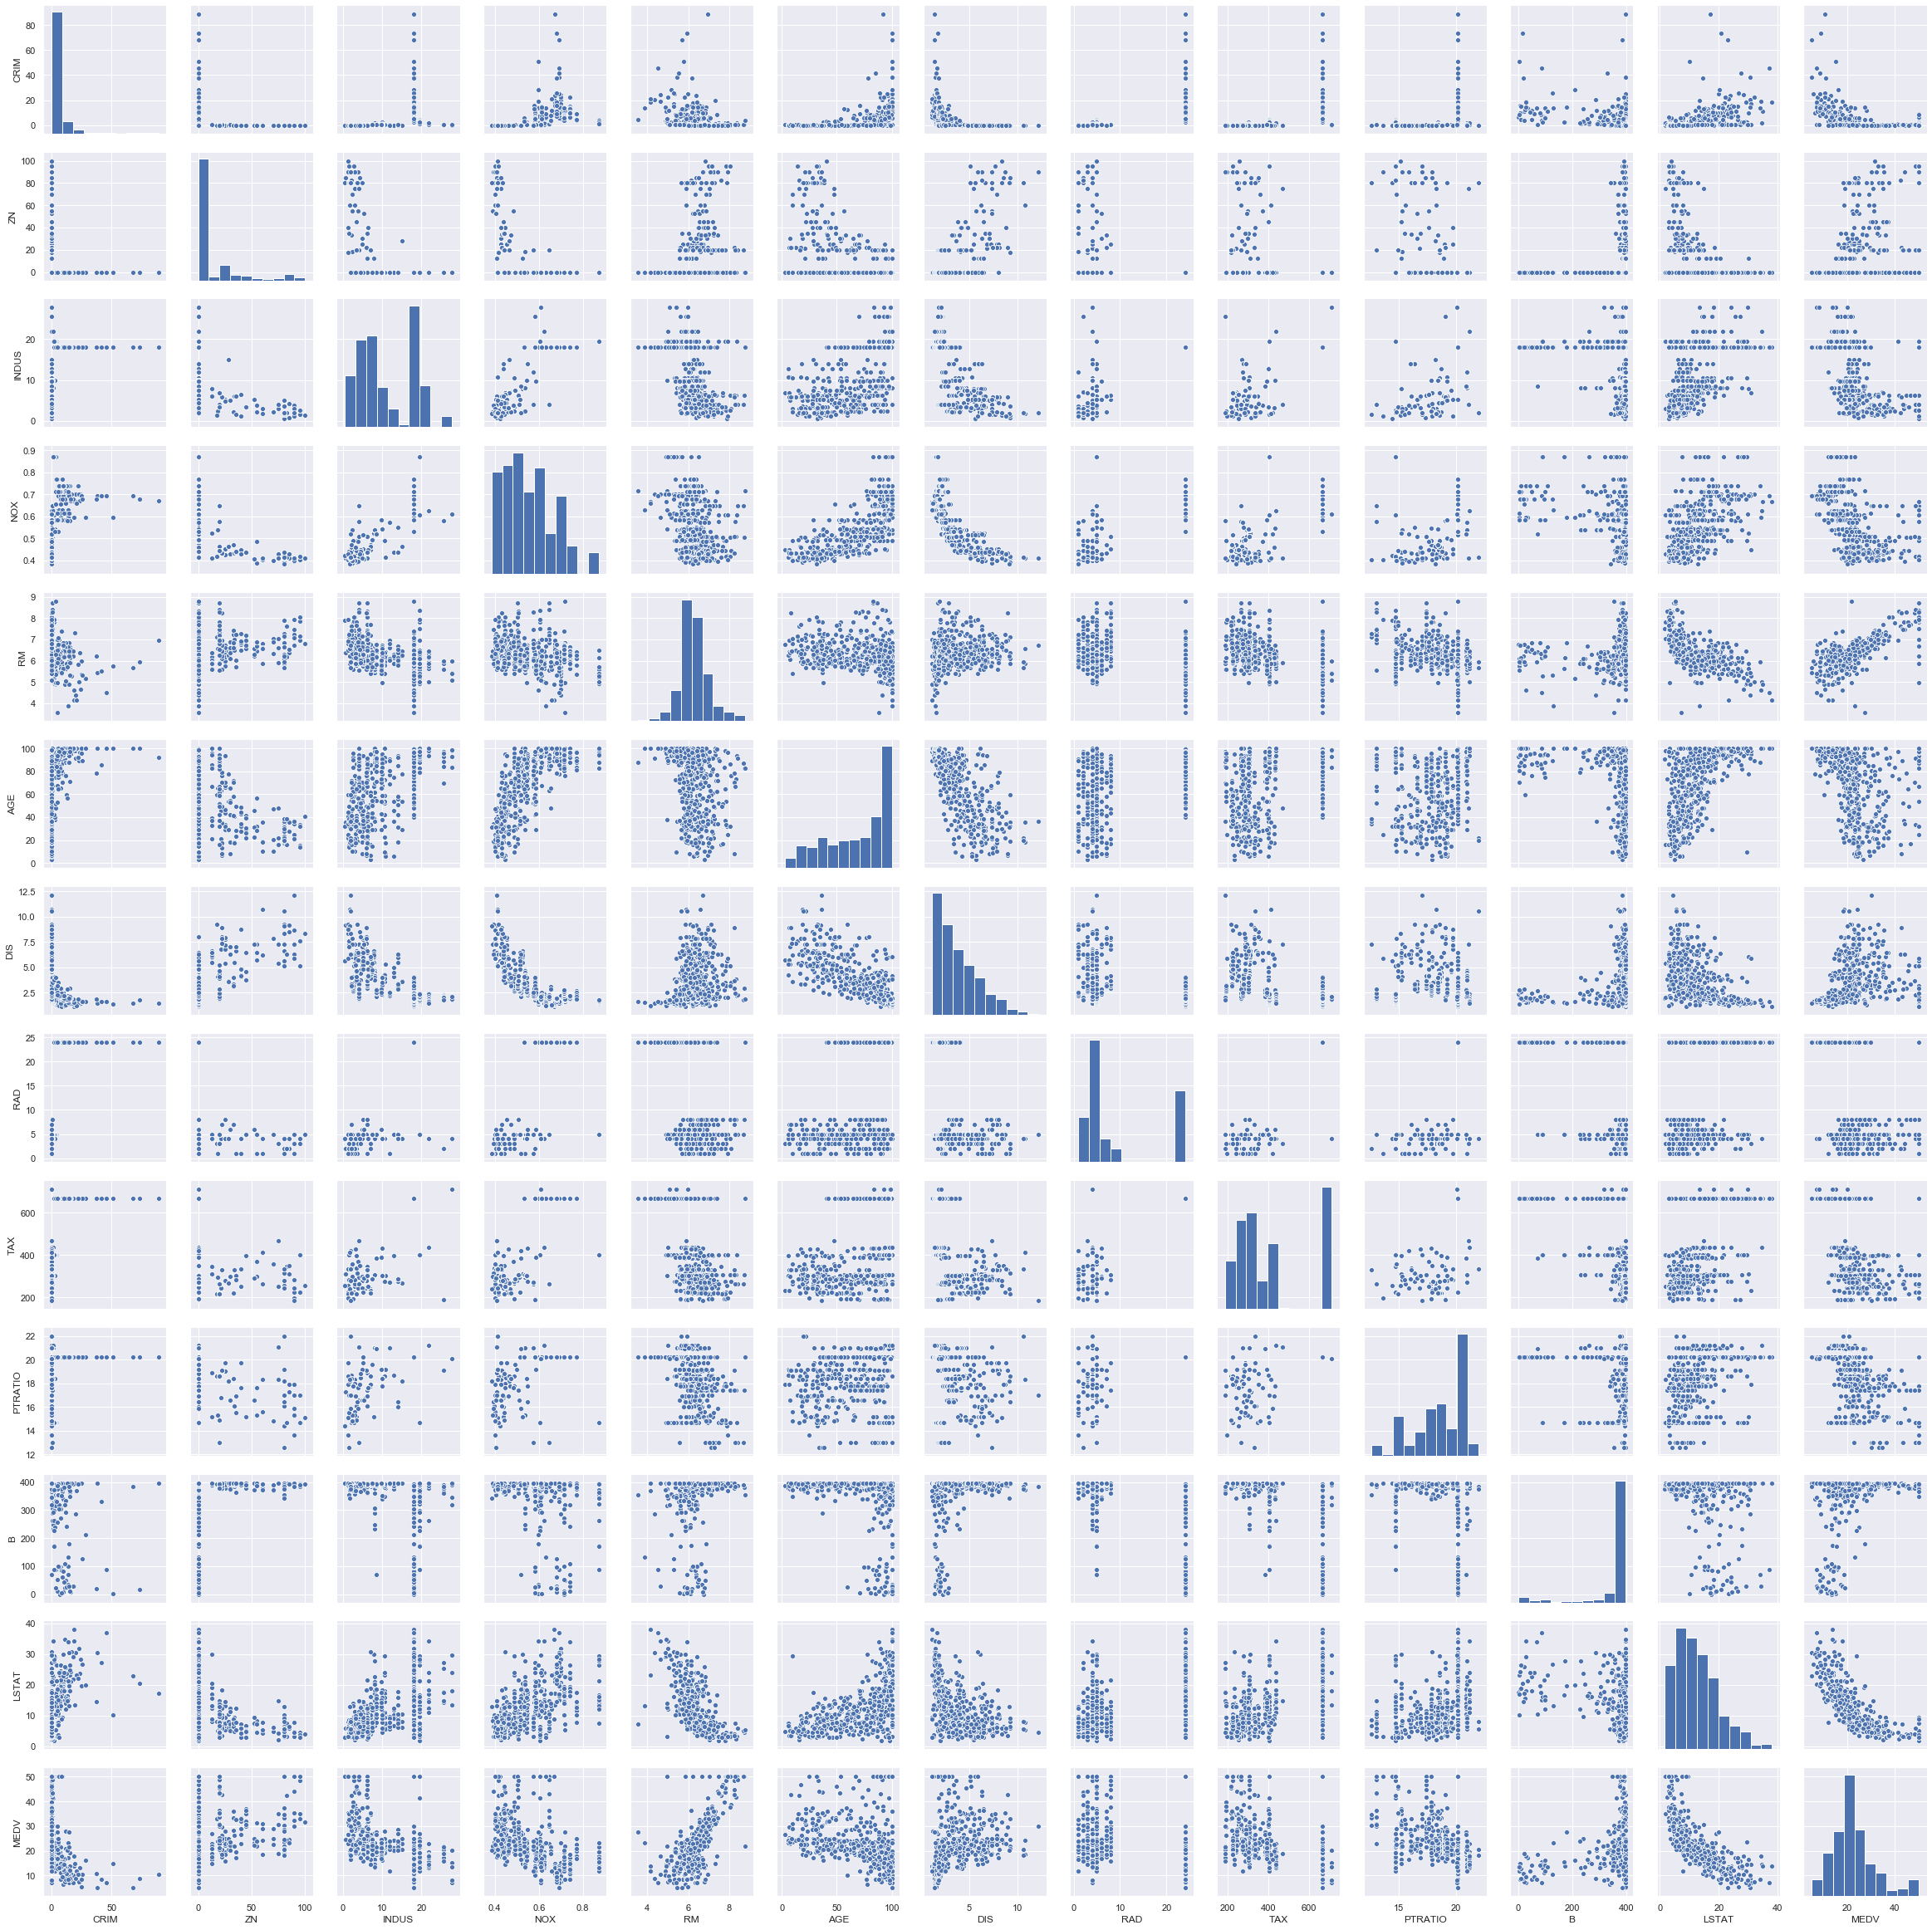

In [37]:
sns.pairplot(data)

По данному графику визуально можно понять что лучше всего с атрибутом MDEV линейно коррелируют атрибуты RM и LSTAT. Рассмотрю их поподробнее. Посмотрю на распределение, выбросы, размах, станд отклонение.

In [38]:
data['RM'].min()

3.5610000000000004

In [39]:
data['RM'].max()

8.78

In [40]:
data['RM'].mean()

6.284634387351788

In [41]:
data['RM'].isnull().sum() # все данные на месте

0

In [42]:
statistics.pstdev(data['RM'])
# исходя из значений min и max, делаем вывод, что станд отклонение достаточно минимальное.

0.7019225143345689

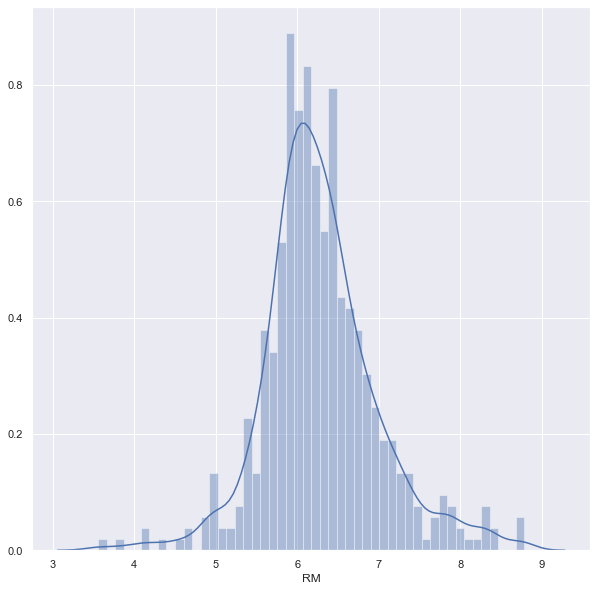

In [43]:
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(data['RM'], bins=50)
plt.show()
# распределение нормальное

теперь очередь LSTAT

In [44]:
data['LSTAT'].min()

1.73

In [45]:
data['LSTAT'].max()

37.97

In [46]:
data['LSTAT'].mean() 

12.653063241106723

In [47]:
data['LSTAT'].isnull().sum() # все данные на месте

0

In [48]:
statistics.pstdev(data['LSTAT'])
# большой разброс 

7.134001636650484

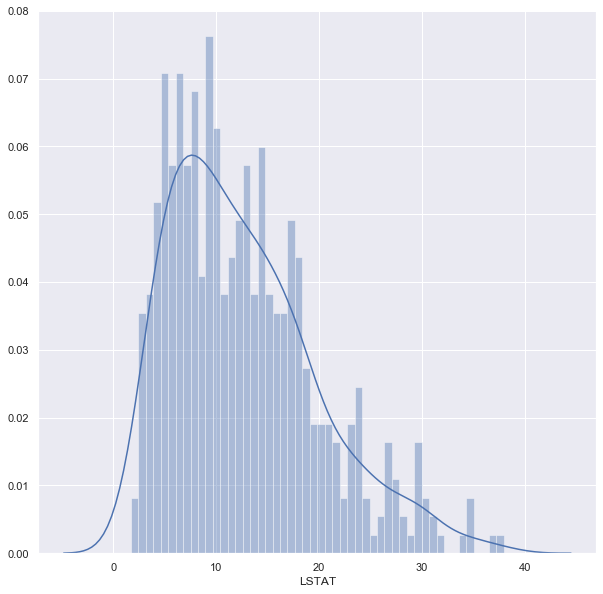

In [49]:
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(data['LSTAT'], bins=50)
plt.show()
# распределение логнормальное

посмотрю частотный график

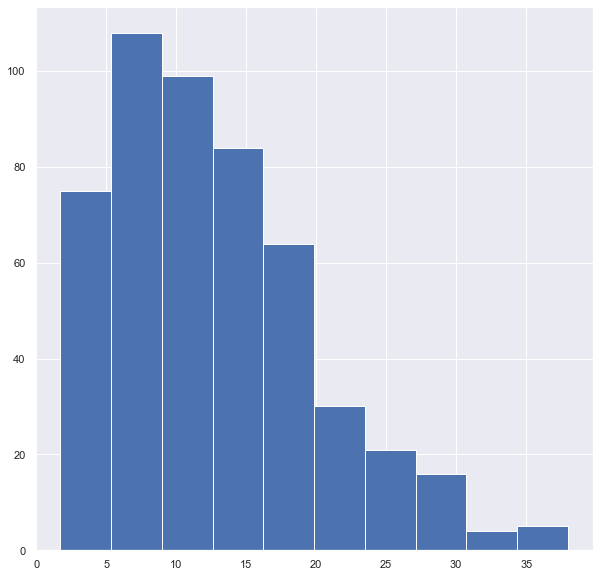

In [50]:
data['LSTAT'].hist()

удалю-ка я значения больше 30

In [51]:
data.query('LSTAT > 29')

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
8,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
48,0.25387,0.0,6.91,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
141,1.62864,0.0,21.89,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41,14.4
144,2.77974,0.0,19.58,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8
147,2.36862,0.0,19.58,0.871,4.926,95.7,1.4608,5,403,14.7,391.71,29.53,14.6
214,0.28955,0.0,10.59,0.489,5.412,9.8,3.5875,4,277,18.6,348.93,29.55,23.7
373,11.10810,0.0,18.10,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.10,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
384,20.08490,0.0,18.10,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
385,16.81180,0.0,18.10,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81,7.2


In [52]:
len(data.query('LSTAT > 29')) # всего 19, можно дропнуть

19

In [53]:
data = data.query('LSTAT < 30')
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [54]:
len(data)

494

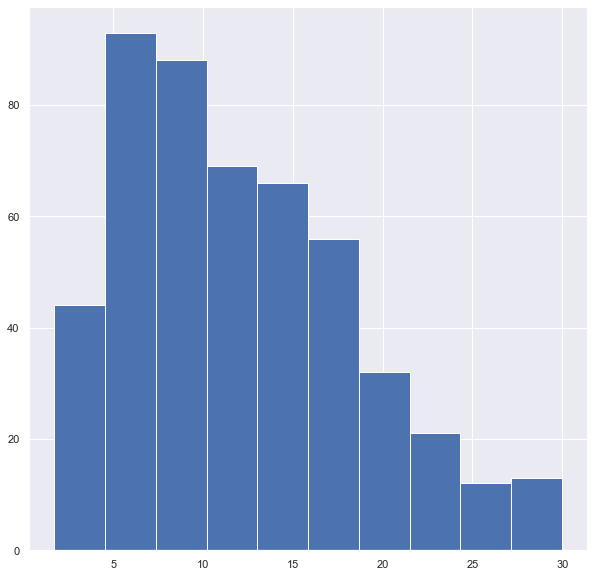

In [55]:
data['LSTAT'].hist()

Здесь пожалуй закончу, так как примерно тут же кончился и вебинар. Если можно, ответьте, пожалуйста, 
почему при определении нового  датасета с условием LSTAT < 30 осталось 494 строки вместо 487 (разница 506 и 19 - количества строк где LSTAT > 29)?